In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

#Read csv file 
df = pd.read_csv('gapminder.csv')
df.head(10)


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.10,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.00,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.50,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.10,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.10,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific
5,8331465,1.41,0.30,8.183160,26.46741,43952,124.1394,80.4,4.6,Europe & Central Asia
6,8868713,1.99,0.10,5.109538,25.65117,14365,128.6024,70.6,43.3,Europe & Central Asia
7,348587,1.89,3.10,3.131921,27.24594,24373,124.3862,72.2,14.5,America
8,148252473,2.38,0.06,0.319161,20.39742,2265,125.0307,68.4,55.9,South Asia
9,277315,1.83,1.30,6.008279,26.38439,16075,126.3940,75.3,15.4,America


Text(0.5, 1.0, 'Correlation Heatmap')

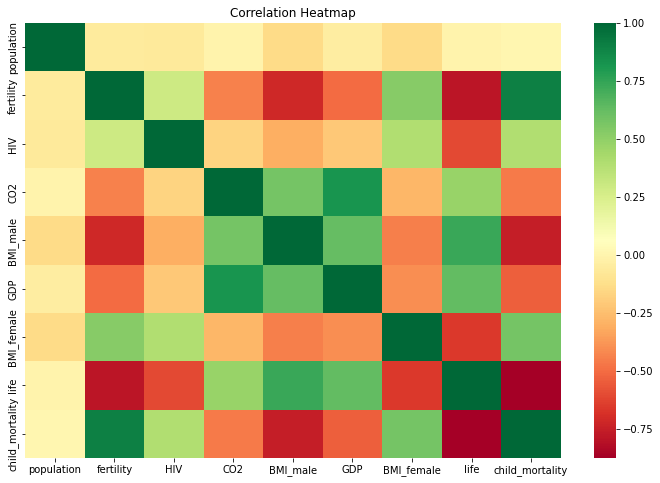

In [2]:
#Visualise data with heat map 
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), cmap = "RdYlGn")
plt.title('Correlation Heatmap')

Regression Score:  0.6192442167740035


Text(0, 0.5, 'Life Expectancy')

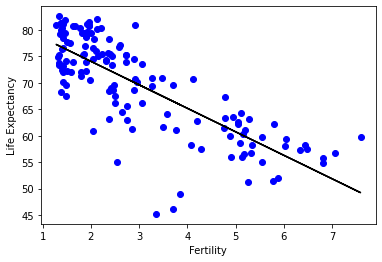

In [3]:
#Apply linear regression with the 'fertility' feature to predict life expectancy 
#Variables = fertility, life expectancy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#We want to predict life expectancy based on fertilitiy
x = df['fertility'].values
y = df['life']

x = x.reshape(-1, 1)

#Training algorithm 
regression = LinearRegression() 
regression.fit(x, y) 

print("Regression Score: ", regression.score(x, y))

#Plot linear regression 
fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x), '-k')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')


In [4]:
#Linear Regression 
x = df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality']]
y = df['life']

#Training algorithm 
regression = LinearRegression() 
regression.fit(x, y) 

print("Regression Score (All Features): ", regression.score(x, y))


Regression Score (All Features):  0.8978171883856773


In [5]:
#Apply 5-fold cross-validation and compare model score accuracy 

from sklearn.model_selection import cross_val_score
from numpy import mean

#5-fold cross-validation for fertility vs life expectancy 

x = df['fertility'].values.reshape(-1,1)
regression.fit(x,y)
scores = cross_val_score(regression, x, y, cv = 5) #Use 5 folds 
print("Average accuracy (for fertility vs life expectancy): ", mean(scores))

#5-fold cross-validation for all features vs life expectancy
x = df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality']]
regression.fit(x,y)

scores = cross_val_score(regression, x, y, cv = 5) #Use 5 folds 
print("Average accuracy (for all features vs life expectancy): ", mean(scores))

#Model score for fertility vs life expectancy is very similar 
#Model for all features vs life has reduced 

Average accuracy (for fertility vs life expectancy):  0.6168819644425119
Average accuracy (for all features vs life expectancy):  0.8599627722769944


In [6]:
#Logistic regression with credit card data 

df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head(10)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


492 frauds,  284315 nonfrauds.
Fraud transactions seem to be less than $5000


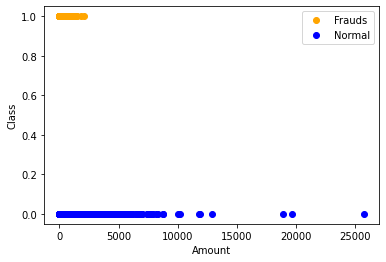

In [7]:
#Attribute 'Class' is marked for fraud transactions (Class = 1)
#Seperate fraud from non-fraud
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds), "frauds, ", len(non_frauds), "nonfrauds.")

#Plot frauds and normal transcations 

plt.plot(frauds.Amount, frauds.Class, 'o', color = "orange", label = "Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color = "blue", label = "Normal")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()

print("Fraud transactions seem to be less than $5000")


C:\Users\adela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(33.0, 0.5, 'True label')

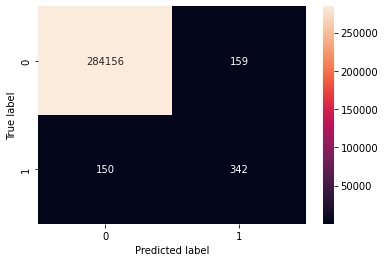

In [8]:
#Logistic Regression to predict fraud transactions and plot the confusion matric 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Seperate into class and attributes 
X = df.drop("Class", axis=1)  
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(X, y)

y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.xlabel("Predicted label")
plt.ylabel("True label")